# Practical session ML: Unsupervised learning

Import the necessary modules.

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import random
from sklearn import datasets, cluster, neighbors, metrics, tree, svm, mixture
from itertools import cycle, islice

# colors to be used in plots
colors = np.array(['r', 'g', 'b', 'y', 'c'])

We will use some artificial data sets to compare the results of different clustering algorithms.

# Part 1: Concentric Circles dataset

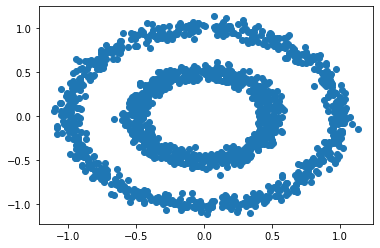

In [19]:
# generate the data
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

# visualize the data
X, y = noisy_circles
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
# function for applying clustering algorithm and visualising the result
def apply(X, algo):
    algo.fit(X)
    labels = algo.labels_.astype(np.int)
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])
    plt.show()
    return labels

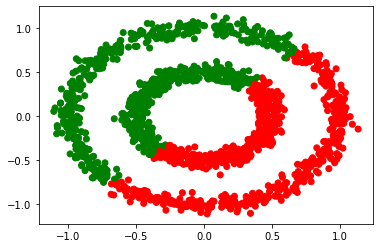

array([0, 0, 1, ..., 1, 0, 0])

In [22]:
# try K-means clustering
apply(X, cluster.KMeans(n_clusters=2, random_state=8))

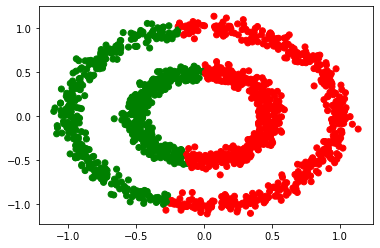

array([0, 0, 1, ..., 1, 1, 0])

In [23]:
# Agglomerative clustering
apply(X, cluster.AgglomerativeClustering(n_clusters=2))

## Exercise 1

Compare the results of Agglomerative Clustering using complete, single, and Ward's linkage. 

**Question:** Can you explain the differences in the results? 

## Exercise 2

Try out Spectral clustering and DBSCAN on the same dataset.

**Question:** Do the default parameter values for DBSCAN work? Why/why not? If not, which parameter values do work, and why? Tip: check out the documentation for DBSCAN at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN.

# Part 2: Mouse dataset

Compare some different clustering algorithms on the mouse data set, which you can find in the file `mouse.txt` bundled with this practical session. The data set itself is easy to load into Python:

In [24]:
with open('mouse.txt') as file:
    mouse = np.loadtxt(file)

Plot the data.

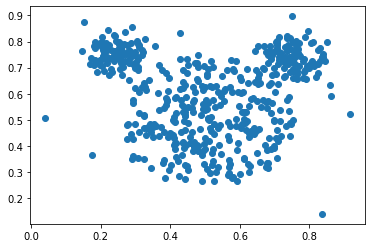

In [25]:
plt.scatter(mouse[:, 0], mouse[:, 1])
plt.show()

## Exercise 1: basic clustering
Now compare the same clustering algorithms that we used before on `mouse`:
- KMeans
- Spectral Clustering
- Agglomerative Clustering
- DBSCAN

See the scikit-learn API at http://scikit-learn.org/stable/modules/classes.html.

**Question:** What are the differences in the results now? Can you explain them?

## Exercise 2 (extra): GMM
Now apply a Gaussian Mixture to the dataset. Note that this algorithm doesn't work exactly like the ones we've seen before: in this case, the clustering is "fuzzy". An interesting source to start from is https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py.

# Part 3: Evaluation of clustering results

## Exercise 1

Plot the SSE for different values of $k$ on the mouse dataset.

**Question:** Can you see on the plot which value of $k$ is best?

## Exercise 2

One way to validate the quality of clustering on a dataset is to compute the distance matrix between samples, and compare it to the incidence matrix resulting from clustering.

We first compute a distance matrix on the mouse data, and visualise it in a heatmap:


In [26]:
distance_matrix = metrics.pairwise.euclidean_distances(mouse,mouse)

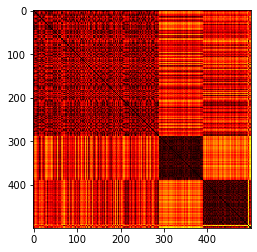

In [27]:
plt.imshow(distance_matrix, cmap='hot', interpolation='nearest')
plt.show()

Here is a piece of code that you can use to compute the incidence matrix corresponding to some clustering result, and plot it afterwards:

In [28]:
def compute_incidence(clustering_array):
    x = clustering_array
    X = np.tile(x, (x.shape[0], 1))
    Xt = X.transpose()
    incidence = X == Xt
    return(incidence)

incidence_matrix = compute_incidence(np.array([0,1,0,0,1,1,1,0]))

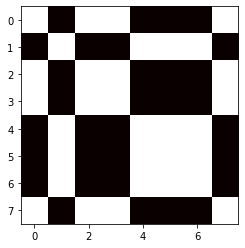

In [29]:
plt.imshow(incidence_matrix, cmap='hot', interpolation='nearest')
plt.show()

Exercise: Compute the incidence matrices corresponding to the different clustering methods that we used previousely (agglomerative, KMeans, spectral embedding, DBSCAN), and compare them to the original distances in the mouse dataset.

*Tip: to compare two matrices, you can first flatten them into simple vectors and then compute a correlation score between them.*

## Exercise 3

Use the Silhouette Score to choose the optimal number of clusters in Spectral Clustering.